## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
dropped_df = application_df.drop(["EIN", "NAME"], axis=1)
dropped_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
dropped_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_types = dropped_df["APPLICATION_TYPE"].value_counts()

In [18]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_types[app_types < 1000].index)

# Replace in dataframe
for app in application_types_to_replace:
    dropped_df['APPLICATION_TYPE'] = dropped_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
dropped_df['APPLICATION_TYPE'].value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
class_types = dropped_df["CLASSIFICATION"].value_counts()
class_types

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
dropped_df['CLASSIFICATION'].value_counts().loc[lambda x : x >1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [17]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_types[class_types < 2000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    dropped_df['CLASSIFICATION'] = dropped_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
dropped_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [19]:
dropped_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,Other,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,Other,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [20]:
# Convert categorical data to numeric with `pd.get_dummies`
dummy_df = pd.get_dummies(dropped_df)
dummy_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [21]:
len(dummy_df.columns)

39

In [22]:
# Split our preprocessed data into our features and target arrays
y = dummy_df["IS_SUCCESSFUL"]
X = dummy_df.drop("IS_SUCCESSFUL", axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [23]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [87]:
len(X_train_scaled)

25724

## Compile, Train and Evaluate the Model

In [57]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_features = len(X_train_scaled[0])
layer1 = 10
layer2 = 10
layer3 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=layer1, activation="tanh", input_dim=num_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=layer2, activation="tanh"))

# # 3rd layer for testing
# nn.add(tf.keras.layers.Dense(units=layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_12"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 10)                390       
                                                                 
 dense_49 (Dense)            (None, 10)                110       
                                                                 
 dense_50 (Dense)            (None, 1)                 11        
                                                                 
Total params: 511 (2.00 KB)
Trainable params: 511 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [59]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 482us/step - loss: 0.5948 - accuracy: 0.7045
Epoch 2/100
804/804 [==============================] - 0s 471us/step - loss: 0.5739 - accuracy: 0.7222
Epoch 3/100
804/804 [==============================] - 0s 495us/step - loss: 0.5677 - accuracy: 0.7250
Epoch 4/100
804/804 [==============================] - 0s 451us/step - loss: 0.5649 - accuracy: 0.7255
Epoch 5/100
804/804 [==============================] - 0s 456us/step - loss: 0.5630 - accuracy: 0.7268
Epoch 6/100
804/804 [==============================] - 0s 456us/step - loss: 0.5615 - accuracy: 0.7275
Epoch 7/100
804/804 [==============================] - 0s 468us/step - loss: 0.5615 - accuracy: 0.7278
Epoch 8/100
804/804 [==============================] - 0s 514us/step - loss: 0.5606 - accuracy: 0.7280
Epoch 9/100
804/804 [==============================] - 0s 485us/step - loss: 0.5602 - accuracy: 0.7277
Epoch 10/100
804/804 [==============================] - 0s 497us/step - l

In [60]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5595 - accuracy: 0.7240 - 154ms/epoch - 573us/step
Loss: 0.5594629645347595, Accuracy: 0.7239649891853333


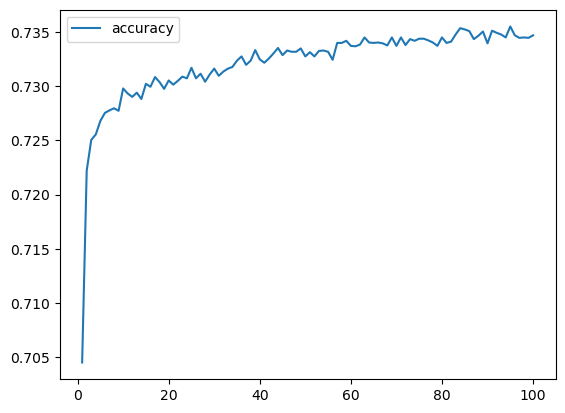

In [61]:
import matplotlib.pyplot as plt

model_df = pd.DataFrame(fit_model.history)
model_df.index += 1
model_df.plot(y="accuracy")
plt.show()

# 3RD ATTEMPT

In [88]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_features = len(X_train_scaled[0])
layer1 = 100
layer2 = 75
layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=layer1, activation="relu", input_dim=num_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=layer2, activation="relu"))

# 3rd layer for testing
nn.add(tf.keras.layers.Dense(units=layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 100)               3900      
                                                                 
 dense_85 (Dense)            (None, 75)                7575      
                                                                 
 dense_86 (Dense)            (None, 30)                2280      
                                                                 
 dense_87 (Dense)            (None, 1)                 31        
                                                                 
Total params: 13786 (53.85 KB)
Trainable params: 13786 (53.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [89]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [90]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 662us/step - loss: 0.5761 - accuracy: 0.7207
Epoch 2/100
804/804 [==============================] - 1s 705us/step - loss: 0.5623 - accuracy: 0.7278
Epoch 3/100
804/804 [==============================] - 1s 638us/step - loss: 0.5598 - accuracy: 0.7283
Epoch 4/100
804/804 [==============================] - 1s 634us/step - loss: 0.5576 - accuracy: 0.7298
Epoch 5/100
804/804 [==============================] - 1s 630us/step - loss: 0.5566 - accuracy: 0.7301
Epoch 6/100
804/804 [==============================] - 1s 632us/step - loss: 0.5564 - accuracy: 0.7296
Epoch 7/100
804/804 [==============================] - 1s 631us/step - loss: 0.5556 - accuracy: 0.7321
Epoch 8/100
804/804 [==============================] - 1s 667us/step - loss: 0.5548 - accuracy: 0.7321
Epoch 9/100
804/804 [==============================] - 1s 632us/step - loss: 0.5546 - accuracy: 0.7325
Epoch 10/100
804/804 [==============================] - 1s 698us/step - l

In [91]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

/opt/homebrew/Caskroom/miniconda/base/envs/RUTDataViz2023/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
